## Import data

In [1]:
# 한글 폰트 사용
# 런타임 다시 시작해야함
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,156 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
plt.rc('font', family='NanumBarunGothic')

import warnings
warnings.filterwarnings('ignore')

In [2]:
household_2017 = pd.read_csv('2017_household.csv', encoding='cp949')
household_2018 = pd.read_csv('2018_household.csv', encoding='cp949')
household_2019 = pd.read_csv('2019_household.csv', encoding='cp949')
household_2020 = pd.read_csv('2020_household.csv', encoding='cp949')
household_2021 = pd.read_csv('2021_household.csv', encoding='cp949')

## Feature Selection

In [3]:
# 변수의 공백 제거
data_list = [household_2017, household_2018, household_2019, household_2020, household_2021]
for data in data_list:
  data.columns = [x.strip() for x in data.columns]

In [4]:
# 비교를 위해서 공통된 column만을 사용하기로 함(120개가 column만을 사용하기로 함)
set_2017 = set(household_2017.columns)
set_2018 = set(household_2018.columns)
set_2019 = set(household_2019.columns)
set_2020 = set(household_2020.columns)
set_2021 = set(household_2021.columns)
common_feature = set_2017 & set_2018 & set_2019 & set_2020 & set_2021

In [5]:
feature_list = [set_2017, set_2018, set_2019, set_2020, set_2021]
for data, feature in zip(data_list, feature_list):
  drop_list = list(feature - common_feature)
  data.drop(drop_list, axis=1, inplace=True)

In [6]:
# 다섯 개의 데이터셋 중 하나 이상에서 결측값이 5% 이상 존재하는 feature는 사용하지 않기로 함
set_2017 = set(household_2017.columns[(household_2017.isnull().mean() < 0.05)])
set_2018 = set(household_2018.columns[(household_2018.isnull().mean() < 0.05)])
set_2019 = set(household_2019.columns[(household_2019.isnull().mean() < 0.05)])
set_2020 = set(household_2020.columns[(household_2020.isnull().mean() < 0.05)])
set_2021 = set(household_2021.columns[(household_2021.isnull().mean() < 0.05)])
full_feature = set_2017 & set_2018 & set_2019 & set_2020 & set_2021

In [7]:
len(full_feature)

83

In [8]:
for data in data_list:
  all_feature = set(data.columns)
  drop_feature = list(all_feature - full_feature)
  data.drop(drop_feature, axis=1, inplace=True)

In [9]:
# 확인 결과, 현재 데이터의 결측 값의 개수는 0개
for data in data_list:
  print(f'총 결측치의 개수는 {data.isnull().sum().sum()}개 입니다.')

총 결측치의 개수는 0개 입니다.
총 결측치의 개수는 0개 입니다.
총 결측치의 개수는 0개 입니다.
총 결측치의 개수는 0개 입니다.
총 결측치의 개수는 0개 입니다.


In [10]:
for column in household_2017.columns:
  print(column)

조사연도
MD제공용_가구고유번호
가중값
수도권여부
가구주_성별코드
가구원수
노인가구코드
조손가구코드
한부모가구코드
장애인가구코드(2012년~)
가구주_교육정도_학력코드
가구주_교육정도_통합코드
가구주_동거여부
가구주_만연령
가구주_10세단위연령코드
가구주_종사상지위코드
보도용_가구주_종사상지위코드
가구주_혼인상태코드
입주형태코드
입주형태통합코드
전용면적규모코드
주택종류통합코드
소득5분위코드(보완)
소득계층구간코드(보도용)(보완)
자산총액5분위코드
순자산5분위코드
자산
자산_금융자산
자산_금융자산_저축금액
자산_금융자산_저축_적립예치식저축금액
자산_금융자산_저축_기타저축금액
자산_금융자산_현거주지전월세보증금
자산_실물자산
자산_실물자산_부동산금액
자산_실물자산_부동산_거주주택금액
자산_실물자산_부동산_거주주택이외부동산금액
자산_실물자산_부동산_계약금중도금납입금액
자산_실물자산_기타실물자산
자산_실물자산_기타실물자산_자동차금액
자산_실물자산_기타실물자산_기타금액
자산_실물자산_기타실물자산_기타_자동차이외기타실물자산
자산_실물자산_기타실물자산_기타_권리금
부채
부채_금융부채
부채_금융부채_담보대출금액
부채_금융부채_담보대출_대출용도_거주주택구입금액
부채_금융부채_담보대출_대출용도_거주주택이외부동산구입금액
부채_금융부채_담보대출_대출용도_전월세보증금마련금액
부채_금융부채_담보대출_대출용도_부채상환금액
부채_금융부채_담보대출_대출용도_사업자금마련금액
부채_금융부채_담보대출_대출용도_생활비마련금액
부채_금융부채_담보대출_대출용도_기타용도금액
부채_금융부채_담보대출_대출기관_은행금액(2010년은 농수협 중앙회 제외)
부채_금융부채_담보대출_대출기관_저축은행금액
부채_금융부채_담보대출_대출기관_보험회사금액
부채_금융부채_담보대출_대출기관_기타기관금액
부채_금융부채_담보대출_담보형태_거주주택금액
부채_금융부채_담보대출_담보형태_거주주택이외부동산금액
부채_금융부채_담보대출_담보형태_예적금보험펀드채권금액
부채_금융부채_담보대출_담보형태_기타금액
부채_금융부채_담보대출_부동산담보대

In [11]:
# 조사연도, MD제공용_가구고유번호, 가중값, 가구주_10세단위연령코드,보도용_가구주_종사상지위코드, 가구주_교육정도_통합코드
# 자산총액5분위코드, 순자산5분위코드, '소득계층구간코드(보도용)(보완)',입주형태통합코드
# 의 경우, 완벽하게 겹치는 항목들이 있거나 필요가 없으므로 제거해주기로 한다.
not_needed_list = ['조사연도', 'MD제공용_가구고유번호', '가중값', '가구주_10세단위연령코드', '보도용_가구주_종사상지위코드', '가구주_교육정도_통합코드', '자산총액5분위코드', '순자산5분위코드',
                   '소득계층구간코드(보도용)(보완)','입주형태통합코드']
for data in data_list:
  data.drop(not_needed_list, axis=1, inplace=True)

* 상관관계를 조사해 본 결과, 굉장히 높은 상관관계를 보여주는 feature들이 여러 개 보였다
* 하부 카테고리의 합이 결국 상위 카테고리의 값과 같거나 비슷한 값을 지니기 때문이다. (ex) 자산 = 금융자산 + 실물자산)
* 그렇기 때문에 다중공선성의 문제가 발생하게 되어 이 점도 고려를 해줘야 한다.
* 이런 점들을 고려해 (각각의 feature들이 겹치는 부분이 없도록) Manual하게 feature들을 선택하기로 함. 

In [12]:
print(f"Manual하게 변수선택을 하기 이전의 feature의 개수: {len(data.columns)}")
select_list = list(data.columns[:16]) + ['자산_금융자산', '자산_실물자산_부동산금액', '자산_실물자산_부동산금액', '부채_금융부채_담보대출금액', 
                                         '부채_금융부채_신용대출금액', '부채_임대보증금', '원리금상환금액', '순자산']
for data in data_list:
  drop_list = list(set(data.columns) - set(select_list))
  data.drop(drop_list, axis=1, inplace=True)
print(f"Manual하게 변수선택을 한 이후의 feature의 개수: {len(data.columns)}")

Manual하게 변수선택을 하기 이전의 feature의 개수: 73
Manual하게 변수선택을 한 이후의 feature의 개수: 23


* 지금까지의 과정을 통해 총 23개의 feature들을 사용하기로 함

## Data Preprocessing

### Categorical Features

* 아직 수치형변수로 변환되지 않은 범주형 변수들을 수치형변수로 변환해 줌

In [13]:
categorical_features = ['수도권여부', '가구주_성별코드', '노인가구코드', '조손가구코드', '한부모가구코드', '장애인가구코드(2012년~)', '가구주_교육정도_학력코드',
                        '주택종류통합코드', '가구주_동거여부', '가구주_종사상지위코드', '가구주_혼인상태코드', '입주형태코드', '전용면적규모코드', '소득5분위코드(보완)']
print(f'범주형 변수의 개수는 {len(categorical_features)}개입니다.')

범주형 변수의 개수는 14개입니다.


In [14]:
def mapping_class(map, data, feature):
  data[[feature]] = data[[feature]].applymap(map.get)
  return data

In [15]:
# 수도권 여부
# G1:수도권, G2:비수도권
map_class={'G1':0, 'G2':1}
for data in data_list:
  mapping_class(map_class, data, '수도권여부')

In [16]:
# 노인가구코드
# G1:노인가구(모든 가구원의 연령이 65세 이상인 가구)
# G2: 그 외
map_class ={'G1':0, 'G2':1}
for data in data_list:
  mapping_class(map_class, data, '노인가구코드')

In [17]:
# 조손가구코드
# G1:조손가구(조부모 가구주와 부모없이 18세 미만 손자녀로 이루어진 가구)
# G2: 그 외
map_class ={'G1':0, 'G2':1}
for data in data_list:
  mapping_class(map_class,data, '조손가구코드')

In [18]:
# 한부모가구코드
# G1:한부모 가구(부모가 한 명이고 18세 미만 미혼자녀가 있는 가구)
# G2: 그 외
map_class ={'G1':0, 'G2':1}
for data in data_list:
  mapping_class(map_class,data, '한부모가구코드')

In [19]:
# 장애인가구코드(2012년~)
# G1:장애인가구(읍·면사무소, 동주민센터에 장애인으로 등록된 가구원이 있는 가구)
# G2: 그 외
map_class ={'G1':0, 'G2':1}
for data in data_list:
  mapping_class(map_class,data, '장애인가구코드(2012년~)')

In [20]:
# 주택종류통합코드
# G1:자가, G2:전세, G3:월세, G4:기타
map_class ={'G4':0, 'G3':1, 'G2':2, 'G1':3}
for data in data_list:
  mapping_class(map_class,data, '주택종류통합코드')

In [21]:
# 전용면적규모코드
map_class ={'G1':0, 'G2':1, 'G3':2, 'G4':3}
for data in data_list:
  mapping_class(map_class, data,'전용면적규모코드')

In [22]:
# 소득5분위코드(보완)
map_class = {'Q1':0, 'Q2':1, 'Q3':2, 'Q4':3, 'Q5':4}
for data in data_list:
  mapping_class(map_class, data,'소득5분위코드(보완)')

In [23]:
# 수치형으로 잘 바뀌었음을 확인할 수 있다.
household_2017.head()

,수도권여부,가구주_성별코드,가구원수,노인가구코드,조손가구코드,한부모가구코드,장애인가구코드(2012년~),가구주_교육정도_학력코드,가구주_동거여부,가구주_만연령,...,전용면적규모코드,주택종류통합코드,소득5분위코드(보완),자산_금융자산,자산_실물자산_부동산금액,부채_금융부채_담보대출금액,부채_금융부채_신용대출금액,부채_임대보증금,원리금상환금액,순자산
0,0,2,3,1,1,1,1,6,2,54,...,3,2,4,70406,56000,9000,0,0,1261,119506
1,0,1,5,1,1,1,1,5,2,47,...,1,2,4,15548,58600,23500,11000,0,2786,48148
2,0,2,1,0,1,1,1,1,1,81,...,0,3,0,5005,0,0,0,0,0,5005
3,1,1,4,1,1,1,1,5,2,58,...,1,2,4,16516,235000,40000,0,20000,1400,201516
4,1,2,2,1,1,1,1,3,2,70,...,0,3,1,216,0,0,0,0,0,216


### numerical features

In [24]:
numerical_features = list(set(household_2017.columns) - set(categorical_features))
print(f'numerical feature의 개수는 {len(numerical_features)}개입니다.')

numerical feature의 개수는 9개입니다.


In [25]:
def draw_plot_for_numerical_features(data, numerical_features):
  plt.figure(figsize=(15,15))
  for idx, feature in enumerate(numerical_features):
    plt.subplot(3,3, idx+1)
    sns.histplot(data[feature], kde=True)
  plt.show()

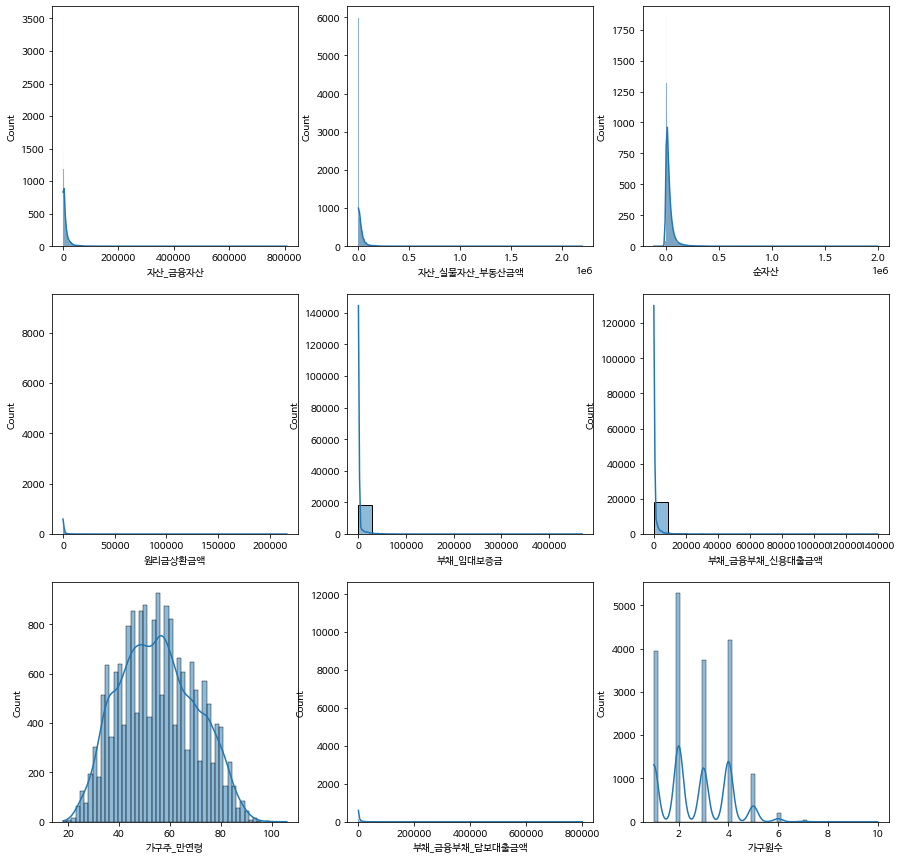

In [26]:
draw_plot_for_numerical_features(household_2017, numerical_features)

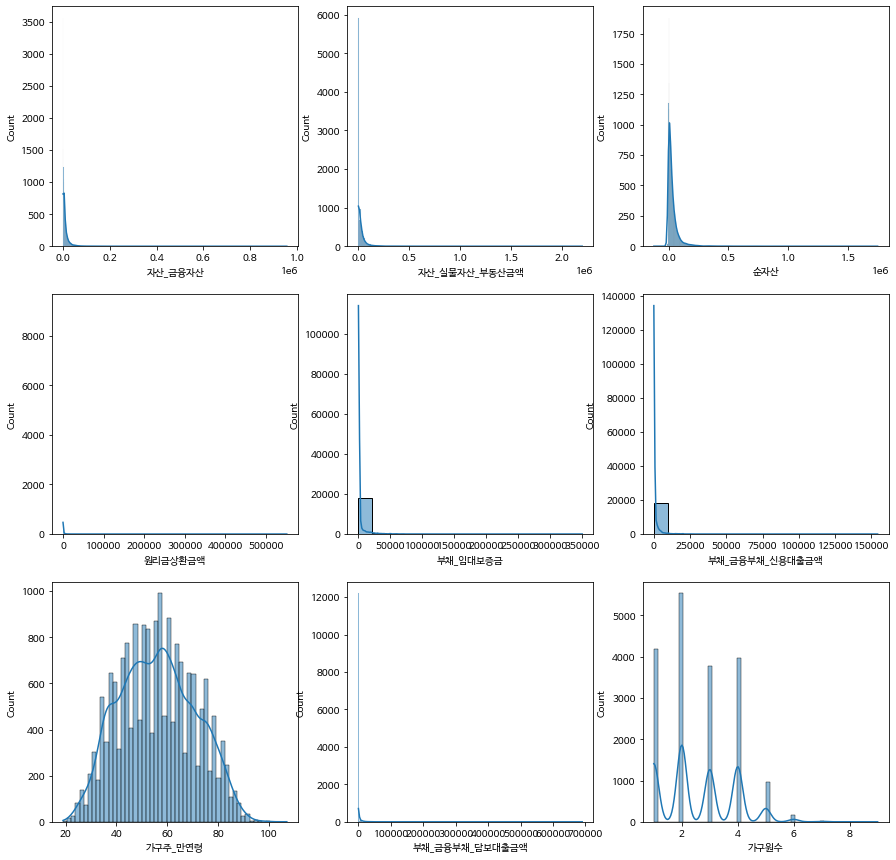

In [27]:
draw_plot_for_numerical_features(household_2018, numerical_features)

* 이외의 연도의 데이터도 위의 연도들과 유사한 양상을 보여줌
* 가구주_만연령과 가구원수를 제외하고는 모두 왜도와 첨도가 매우 높음을 알 수 있다.
* 가구주_만연령과 가구원수는 로그변환 등을 사용하는 것이 바람직하지 않으므로 이대로 사용하도록 하고, 나머지 변수들은 로그 변환을 사용하기로 한다.
* 이 때, 밑이 10인 로그를 사용하기로 한다(이후에 해석을 하기도 보다 수월하고, 자연로그보다 skewed된 정도를 더 많이 잡을 수 있기 때문이다.)

In [28]:
log_features = list(set(numerical_features) - set(['가구주_만연령', '가구원수']))

In [29]:
def log_transformation(log_features, data):
  for feature in log_features:
    sgn = np.sign(data[feature])
    data[feature] = np.log10(abs(data[feature]) +1) * sgn
  return data

In [30]:
for data in data_list:
  data = log_transformation(log_features,data)

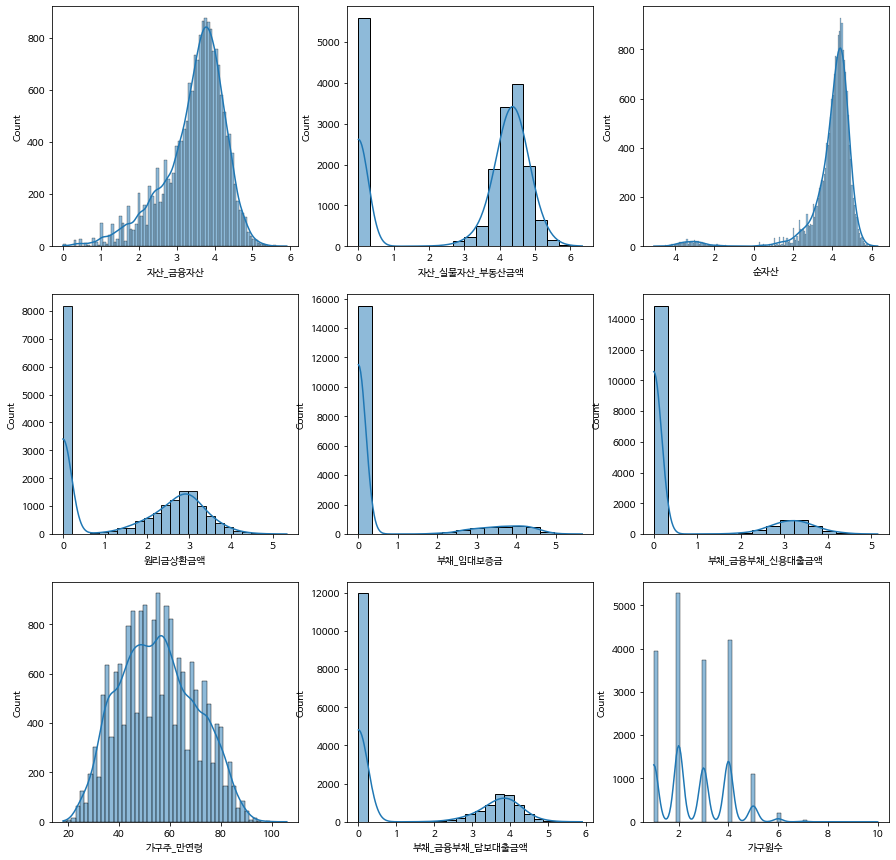

In [31]:
# 로그 변환을 실시한 결과, 이전보다는 덜 skewed된 것을 확인할 수 있다.
draw_plot_for_numerical_features(household_2017, numerical_features)

### Outliers

* 이상치 처리의 경우, 어떤 기준으로 설정해도 데이터의 특성상 이상치가 굉장히 많고,
* 이상치들이 의미가 없거나 잘못 측정된 값들이 아니기 때문에 따로 이상치 처리는 진행하지 않기로한다.

### Missing values & Duplicates

* 위에서 변수선택을 하는 과정에서 결측치는 모두 제거됨

* 현실적으로 모든 23개의 항목에서 모두 같은 값이 나오는 것은 불가능하므로 중복값이 있는 행은 제거해주기로 함

In [32]:
for idx,data in enumerate(data_list):
  year = idx + 2017
  num = data.duplicated().sum()
  print(f'{year}년의 중복값의 개수는 {num}개입니다.')

2017년의 중복값의 개수는 3개입니다.
2018년의 중복값의 개수는 1개입니다.
2019년의 중복값의 개수는 0개입니다.
2020년의 중복값의 개수는 1개입니다.
2021년의 중복값의 개수는 2개입니다.


In [33]:
for data in data_list:
  data.drop_duplicates(inplace=True)

In [34]:
for idx,data in enumerate(data_list):
  year = idx + 2017
  num = data.duplicated().sum()
  print(f'{year}년의 중복값의 개수는 {num}개입니다.')

2017년의 중복값의 개수는 0개입니다.
2018년의 중복값의 개수는 0개입니다.
2019년의 중복값의 개수는 0개입니다.
2020년의 중복값의 개수는 0개입니다.
2021년의 중복값의 개수는 0개입니다.


### Scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

scaler = MinMaxScaler()
column_list = household_2017.columns
household_2017_scaled = scaler.fit_transform(household_2017)
household_2017_scaled = pd.DataFrame(household_2017_scaled, columns=column_list)

In [36]:
# 범주형 변수는 빨간색으로, 수치형 변수는 파란색으로 표시함
def draw_plot_for_all_features(categorical_features, numerical_features, data):
  plt.figure(figsize=(20,20))
  column_list = list(data.columns)
  for idx, column in enumerate(column_list):
    if column in categorical_features:
      plt.subplot(5,5, idx+1)
      sns.histplot(data[column], color='red')
    else:
      plt.subplot(5,5, idx+1)
      sns.histplot(data[column], kde=True)
  plt.show()

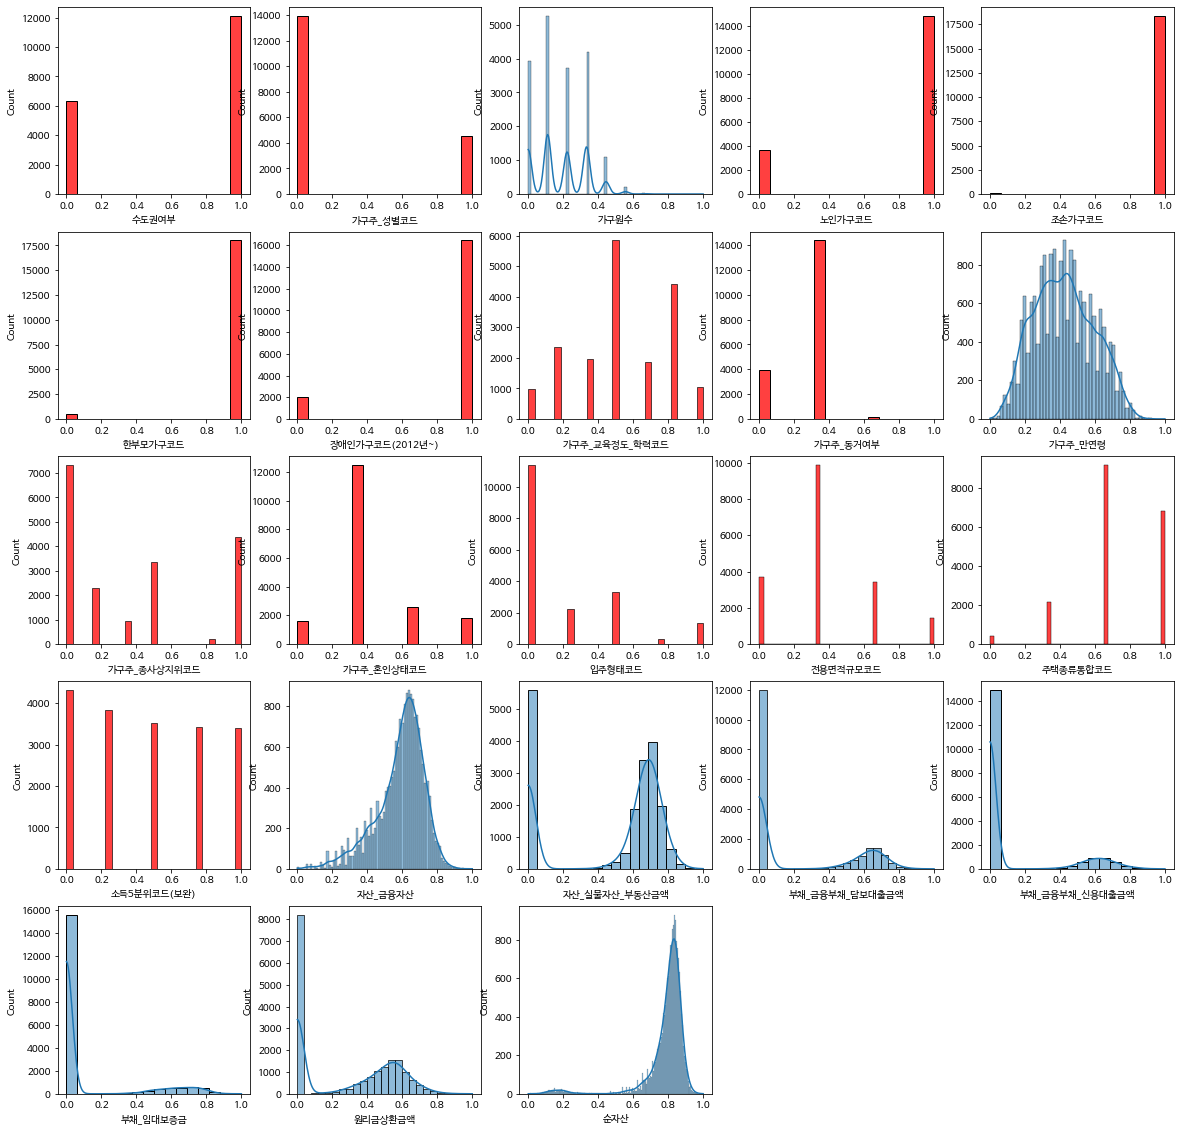

In [37]:
draw_plot_for_all_features(categorical_features, numerical_features, household_2017_scaled)

* 모든 데이터에 대해서 스케일링을 실행

In [38]:
def scaling_data(data, scaler="MinMax"):
  if scaler == "MinMax":
    scaler = MinMaxScaler()
  elif scaler == "Standard":
    scaler = StandardScaler()
  elif scaler == "Robust":
    scaler = RobustScaler()
  else:
    print('Choose the Scaler(MinMax, Standard, Robust)')
    return
  column_list = data.columns
  temp = scaler.fit_transform(data)
  df = pd.DataFrame(temp, columns=column_list)
  return df

In [39]:
household_2017_scaled = scaling_data(household_2017)
household_2018_scaled = scaling_data(household_2018)
household_2019_scaled = scaling_data(household_2019)
household_2020_scaled = scaling_data(household_2020)
household_2021_scaled = scaling_data(household_2021)

In [40]:
household_2021_scaled.head()

,수도권여부,가구주_성별코드,가구원수,노인가구코드,조손가구코드,한부모가구코드,장애인가구코드(2012년~),가구주_교육정도_학력코드,가구주_동거여부,가구주_만연령,...,전용면적규모코드,주택종류통합코드,소득5분위코드(보완),자산_금융자산,자산_실물자산_부동산금액,부채_금융부채_담보대출금액,부채_금융부채_신용대출금액,부채_임대보증금,원리금상환금액,순자산
0,0.0,1.0,0.000,0.0,1.0,1.0,1.0,0.142857,0.000000,0.654762,...,0.000000,1.000000,0.00,0.695332,0.000000,0.000000,0.000000,0.000000,0.000000,0.817119
1,0.0,0.0,0.125,1.0,1.0,1.0,1.0,0.428571,0.333333,0.476190,...,0.333333,1.000000,0.25,0.684977,0.000000,0.000000,0.000000,0.000000,0.000000,0.811588
2,0.0,1.0,0.000,1.0,1.0,1.0,1.0,0.428571,0.000000,0.107143,...,0.000000,1.000000,0.00,0.527191,0.000000,0.000000,0.530919,0.000000,0.467763,0.712935
3,1.0,0.0,0.125,0.0,1.0,1.0,1.0,0.428571,0.333333,0.630952,...,0.000000,1.000000,0.25,0.669436,0.611750,0.000000,0.000000,0.445317,0.000000,0.819411
4,1.0,0.0,0.000,1.0,1.0,1.0,1.0,0.428571,0.000000,0.404762,...,0.333333,0.333333,0.25,0.521789,0.598932,0.605207,0.000000,0.000000,0.624221,0.258160


### 군집화 프로젝트

* 스케일링까지 포함해서 모든 전처리 작업을 완료했음
* 2017~2021년까지 5개에 대해서 모두 동일한 방식으로 전처리를 진행함
* 모두 동일한 방식으로 군집화를 진행하고, 그 결과를 비교해봐도 좋고, 아니면 5개 중 2~3개의 연도를 골라서(ex) 2017년, 2021년)을 골라서 군집화를 실시하고, 비교분석해도 좋을 것 같음
* 군집화를 할 시에는 기본적으로 scaled라는 이름이 붙은 데이터를 사용  
(scaling되지 않은 데이터는 혹시 몰라서 일단 남겨둠)
* 군집화를 진행할 때, k-means, 계층적 군집화를 비롯한 다양한 방법들을 시도해보고, 그 중 가장 군집화가 잘 된 것을 선정하거나 각각을 따로 해석해도 괜찮을 것 같음

In [41]:
from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation, DBSCAN
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold
from sklearn.manifold import TSNE

In [42]:
X = household_2017

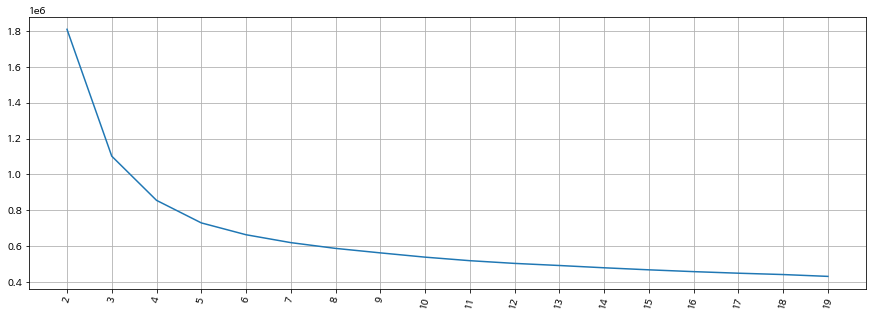

In [43]:
# 군집 내 SSE 값
distorsions = []
max_loop=20
for k in range(2, max_loop):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, max_loop), distorsions)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.grid(True)

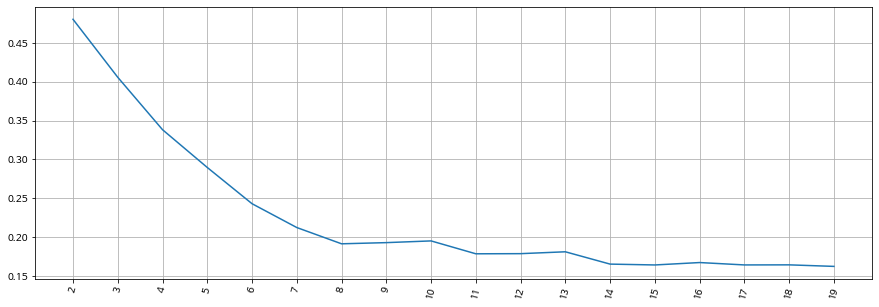

In [44]:
# 실루엣 계수
from sklearn import metrics
silhouette_score = []
for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans.fit(X)        
        silhouette_score.append(metrics.silhouette_score(X, kmeans.labels_, random_state=10))
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, max_loop), silhouette_score)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.grid(True)

In [57]:
nclust=4

k_means = cluster.KMeans(n_clusters=nclust)
k_means.fit(X)

KMeans(n_clusters=4)

In [46]:
n_components=2
model = TSNE(n_components=n_components)

In [47]:
manifold_X = model.fit_transform(X)

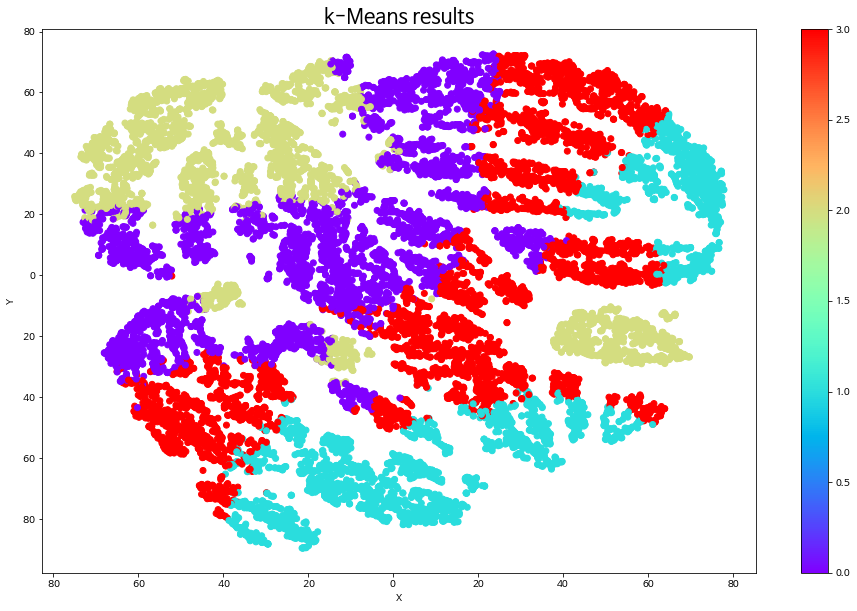

In [58]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(manifold_X[:,0],manifold_X[:,1], c = k_means.labels_, cmap ="rainbow")
ax.set_title('k-Means results', fontsize=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.colorbar(scatter)

In [49]:
n_components=3
model = TSNE(n_components=n_components)
manifold_X_3D = model.fit_transform(X)

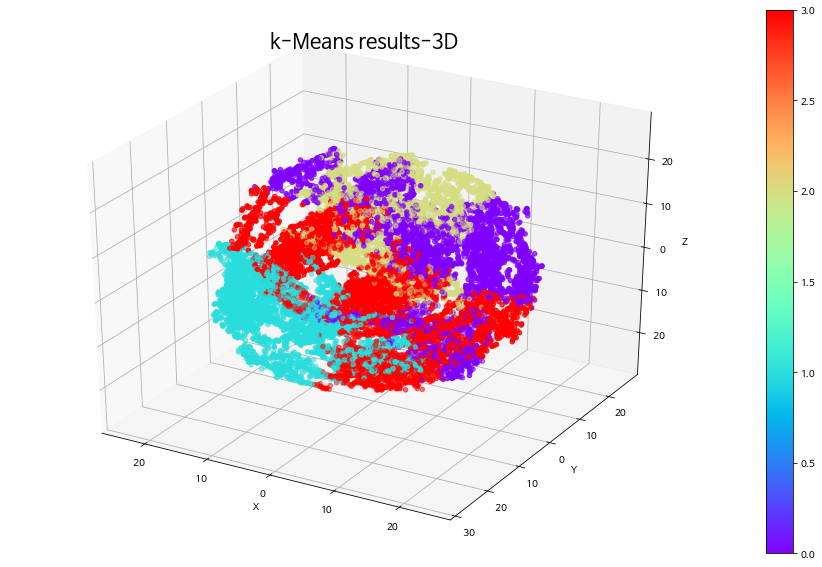

In [59]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(manifold_X_3D[:,0],manifold_X_3D[:,1], manifold_X_3D[:,2], c = k_means.labels_, cmap ="rainbow")
ax.set_title('k-Means results-3D', fontsize=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.colorbar(scatter)

### 계층적 군집화

In [51]:
from scipy.cluster.hierarchy import dendrogram, linkage, ward

#Calulate linkage
Z= linkage(X, method='ward')
Z[0]

array([1.06600000e+03, 1.09080000e+04, 3.68881077e-03, 2.00000000e+00])

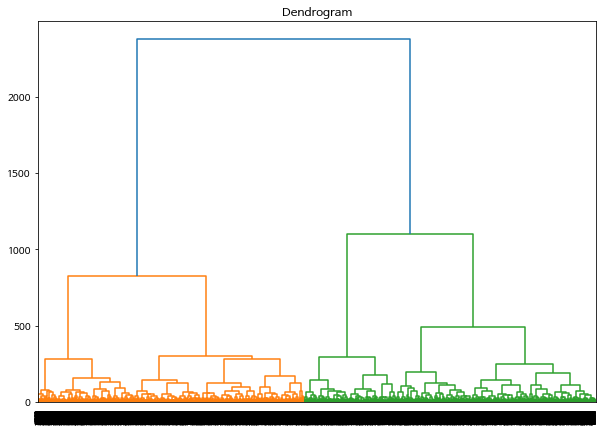

In [52]:
#Plot Dendogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram(Z,labels = X.index)
plt.show()

In [53]:
distance_threshold = 600
clusters = fcluster(Z, distance_threshold, criterion='distance')
chosen_clusters = pd.DataFrame(data=clusters, columns=['cluster'])
chosen_clusters['cluster'].unique()

array([2, 3, 4, 1], dtype=int32)

In [54]:
nclust = 4
hc = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
clust_labels1 = hc.fit_predict(X)

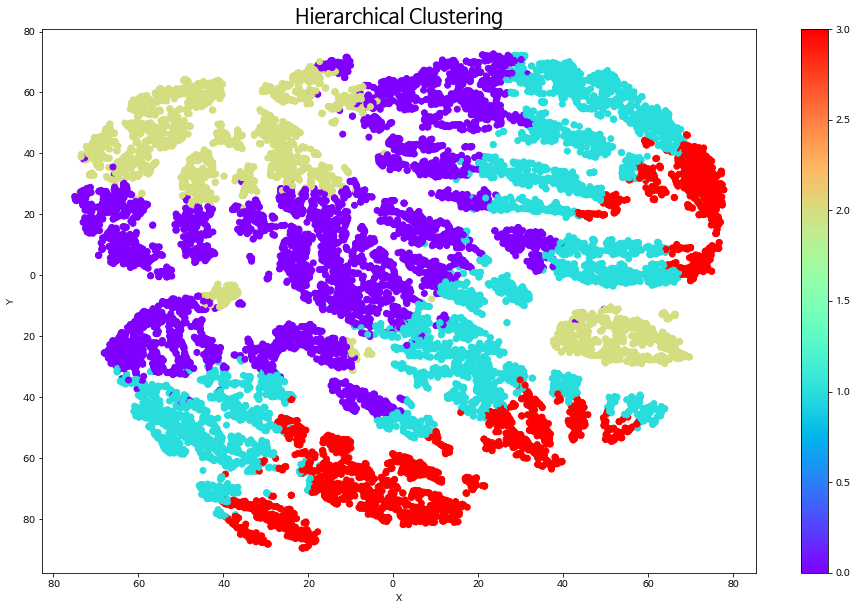

In [55]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(manifold_X[:,0],manifold_X[:,1], c = clust_labels1, cmap ="rainbow")
ax.set_title('Hierarchical Clustering', fontsize=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.colorbar(scatter)

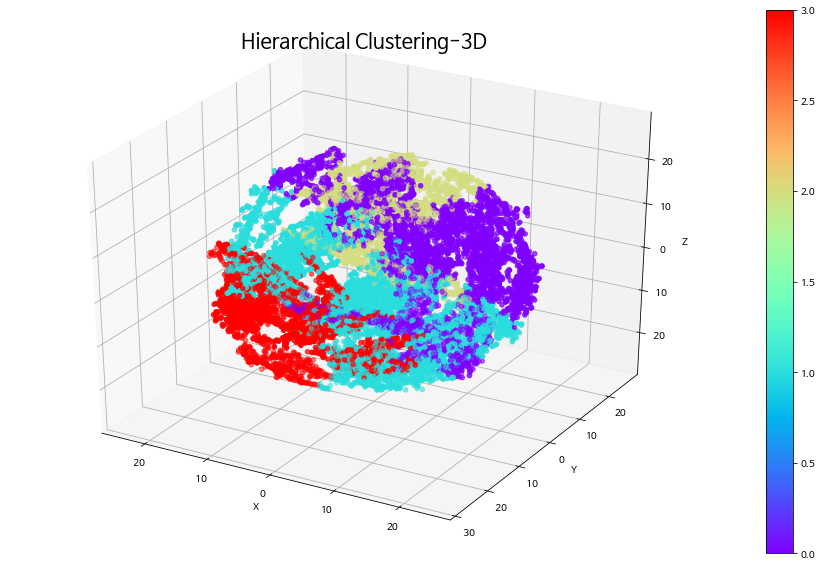

In [56]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(manifold_X_3D[:,0],manifold_X_3D[:,1], manifold_X_3D[:,2], c = clust_labels1, cmap ="rainbow")
ax.set_title('Hierarchical Clustering-3D', fontsize=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.colorbar(scatter)